**Understanding industry classifications**

1. we must first understand what industry classification is best to use and the nuances between each one.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set paths here C:\Users\clint\Desktop\compstak-ra\src\exploration_1.ipynb
#C:\Users\clint\Desktop\compstak-ra\data\data\university-of-british-columbia-leases-2025-04-02.csv
#C:\Users\clint\Desktop\compstak-ra\data\data\university-of-british-columbia-sales-2025-04-02.csv
#C:\Users\clint\Desktop\compstak-ra\data\data\cb_2018_us_state_5m\cb_2018_us_state_5m.shp
path = 'C:/Users/clint/Desktop/data/data/'
path_census = 'C:/Users/clint/Desktop/data/cb_2018_us_state_5m/'

# Load the data
sales = pd.read_csv(path + 'university-of-british-columbia-sales-2025-04-02.csv')
leases = pd.read_csv(path + 'university-of-british-columbia-leases-2025-04-02.csv')

C:\Users\clint\AppData\Local\Temp\ipykernel_9500\2352418797.py:13: DtypeWarning: Columns (8,52,73,77) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv(path + 'university-of-british-columbia-sales-2025-04-02.csv')
C:\Users\clint\AppData\Local\Temp\ipykernel_9500\2352418797.py:14: DtypeWarning: Columns (15,35,37,59,61,67,71,73,76,77,78,80,82,85) have mixed types. Specify dtype option on import or set low_memory=False.
  leases = pd.read_csv(path + 'university-of-british-columbia-leases-2025-04-02.csv')


In [11]:
# Get unique property types in each dataset
leases_prop_types = leases['Property Type'].unique()
sales_prop_types = sales['Property Type'].unique()
leases_prop_subtypes = leases['Property Subtype'].unique()
sales_prop_subtypes = sales['Property Subtype'].unique()

print("Leases Property Types:")
print(leases_prop_types)

print("\nSales Property Types:")
print(sales_prop_types)

Leases Property Types:
['Office' 'Land' 'Multi-Family' 'Retail' 'Mixed-Use' 'Hotel' 'Other'
 'Industrial' nan]

Sales Property Types:
['Office' 'Land' nan 'Multi-Family' 'Industrial' 'Retail' 'Other' 'Hotel'
 'Mixed-Use']


In [12]:
# Analyzing unique buildings in the sales dataset

# Count unique Property IDs in the sales dataframe
unique_buildings_sales = sales['Property Id'].nunique()
total_sales_records = len(sales)

print(f"Number of unique buildings (Property IDs) in sales data: {unique_buildings_sales}")
print(f"Total number of sales records: {total_sales_records}")
print(f"Ratio of unique buildings to total records: {unique_buildings_sales / total_sales_records:.4f}")

# Check for duplicate Property IDs - buildings with multiple sales records
property_id_counts = sales['Property Id'].value_counts()
buildings_with_multiple_sales = (property_id_counts > 1).sum()
max_sales_per_building = property_id_counts.max()

print(f"\nNumber of buildings with multiple sales records: {buildings_with_multiple_sales}")
print(f"Maximum number of sales records for a single building: {max_sales_per_building}")

Number of unique buildings (Property IDs) in sales data: 500230
Total number of sales records: 563653
Ratio of unique buildings to total records: 0.8875

Total number of sales records: 563653
Ratio of unique buildings to total records: 0.8875

Number of buildings with multiple sales records: 52928
Maximum number of sales records for a single building: 53

Number of buildings with multiple sales records: 52928
Maximum number of sales records for a single building: 53


In [13]:
# Compare with leases dataset
unique_buildings_leases = leases['Property Id'].nunique()
total_leases_records = len(leases)

print(f"Number of unique buildings (Property IDs) in leases data: {unique_buildings_leases}")
print(f"Total number of lease records: {total_leases_records}")
print(f"Ratio of unique buildings to total records: {unique_buildings_leases / total_leases_records:.4f}")

# Buildings that appear in both datasets
buildings_in_sales = set(sales['Property Id'].unique())
buildings_in_leases = set(leases['Property Id'].unique())
buildings_in_both = buildings_in_sales.intersection(buildings_in_leases)

print(f"\nNumber of buildings that appear in both sales and leases datasets: {len(buildings_in_both)}")
print(f"Percentage of sales buildings also in leases: {len(buildings_in_both)/len(buildings_in_sales):.2%}")
print(f"Percentage of leases buildings also in sales: {len(buildings_in_both)/len(buildings_in_leases):.2%}")

Number of unique buildings (Property IDs) in leases data: 333701
Total number of lease records: 1168997
Ratio of unique buildings to total records: 0.2855

Number of buildings that appear in both sales and leases datasets: 74308
Percentage of sales buildings also in leases: 14.85%
Percentage of leases buildings also in sales: 22.27%

Number of buildings that appear in both sales and leases datasets: 74308
Percentage of sales buildings also in leases: 14.85%
Percentage of leases buildings also in sales: 22.27%


In [14]:
# Calculate total unique buildings in our dataset (no duplicates)
total_unique_buildings = len(set(sales['Property Id']).union(set(leases['Property Id'])))


## Dataset Coverage Analysis: Comparing to U.S. Commercial Building Stock

Let's assess how representative our dataset is by comparing it to the total U.S. commercial building stock.

In [15]:
# According to reference data, there are approximately 5.9 million commercial buildings in the United States
total_us_commercial_buildings = 5_900_000

# Calculate what percentage of all U.S. commercial buildings our dataset represents
dataset_coverage_percentage = (total_unique_buildings / total_us_commercial_buildings) * 100

print(f"Total unique buildings in our dataset: {total_unique_buildings:,}")
print(f"Total commercial buildings in the U.S.: {total_us_commercial_buildings:,}")
print(f"Our dataset represents {dataset_coverage_percentage:.2f}% of all U.S. commercial buildings")

# Breakdown by property type
print("\nBreakdown by property type:")
sales_property_type_counts = sales['Property Type'].value_counts()
leases_property_type_counts = leases['Property Type'].value_counts()

print("\nSales dataset property types:")
print(sales_property_type_counts)

print("\nLeases dataset property types:")
print(leases_property_type_counts)

Total unique buildings in our dataset: 759,623
Total commercial buildings in the U.S.: 5,900,000
Our dataset represents 12.87% of all U.S. commercial buildings

Breakdown by property type:

Sales dataset property types:
Property Type
Retail          173102
Industrial      112989
Multi-Family     92561
Office           88399
Land             50548
Other             8907
Hotel             5500
Mixed-Use         3028
Name: count, dtype: int64

Leases dataset property types:
Property Type
Office          659897
Industrial      296444
Retail          172828
Multi-Family     15391
Mixed-Use         6636
Land              3037
Other             2118
Hotel              643
Name: count, dtype: int64


## U.S. Commercial Buildings by Type: Internet Data vs Our Dataset

We found online estimates for commercial buildings in the United States by type. Let's compare these with our dataset to understand representation by category.

In [16]:
# Internet data on estimated U.S. commercial buildings by type with updated figures
internet_data = {
    'Retail': 1070000,       # 1.07 million brick-and-mortar retail establishments as of 2023
    'Industrial': 350000,     # Includes warehouses, manufacturing facilities, etc.
    'Office': 569311,         # Includes Class A, B, and C office buildings as of 2018
    'Multi-Family': 5200000,  # Includes duplexes, triplexes, and apartment buildings
    'Hotel': 116873,         # Number of hotels and motels as of 2025
    'Mixed-Use': 580000,     # Buildings combining residential with commercial use (apartments within)
    'Land': 13100000,        # Total commercial land parcels across all U.S. states
    'Other': None,            # Includes education, medical, religious facilities (included in total)
}

# Total commercial properties nationwide
total_commercial_properties = 13100000  # Total number of commercial property parcels nationwide

# Notes for each category
category_notes = {
    'Retail': 'Number of brick-and-mortar retail establishments as of 2023.',
    'Industrial': 'Includes warehouses, manufacturing facilities, etc.',
    'Office': 'Includes Class A, B, and C office buildings as of 2018.',
    'Multi-Family': 'Includes duplexes, triplexes, and apartment buildings.',
    'Hotel': 'Number of hotels and motels as of 2025.',
    'Mixed-Use': 'Buildings combining residential with commercial use.',
    'Land': 'Total commercial property parcels across all U.S. states.',
    'Other': 'Includes education, medical, religious, and other facilities.',
}

# Create a mapping between our categories and internet data categories
# Some categories might need to be mapped differently based on your dataset
category_mapping = {
    'Office': 'Office',
    'Industrial': 'Industrial',
    'Retail': 'Retail',
    'Multi-Family': 'Multi-Family',
    'Hotel': 'Hotel',
    'Land': 'Land',
    'Mixed-Use': 'Mixed-Use',
    'Other': 'Other'
}

# Add emoji icons for visual appeal
category_emoji = {
    'Retail': '🛍️',
    'Industrial': '🏭',
    'Office': '🏢',
    'Multi-Family': '🏘️',
    'Hotel': '🏨',
    'Mixed-Use': '🏙️',
    'Land': '🌱',
    'Other': '🧩'
}

# Count buildings in our dataset by property type
our_data_counts = {}
for prop_type in property_types:
    sales_ids = set(sales[sales['Property Type'] == prop_type]['Property Id'].unique())
    leases_ids = set(leases[leases['Property Type'] == prop_type]['Property Id'].unique())
    unique_ids = sales_ids.union(leases_ids)
    our_data_counts[prop_type] = len(unique_ids)

# Create a comparison table
comparison_data = []
for category, count in our_data_counts.items():
    # Map our category to internet category if available
    internet_category = category_mapping.get(category, 'Other')
    internet_count = internet_data.get(internet_category)
    icon = category_emoji.get(internet_category, '')
    note = category_notes.get(internet_category, '')
    
    coverage_pct = None
    if internet_count is not None and internet_count > 0:
        coverage_pct = (count / internet_count) * 100
    
    comparison_data.append({
        'Category': f"{icon} {category}",
        'Our Dataset Count': f"{count:,}",
        'U.S. Estimated Count': f"{internet_count:,}" if internet_count is not None else 'Included in total',
        'Coverage (%)': f"{coverage_pct:.4f}%" if coverage_pct is not None else 'N/A',
        'Notes': note
    })

# Add a total row
comparison_data.append({
    'Category': '📦 Total',
    'Our Dataset Count': f"{total_unique_buildings:,}",
    'U.S. Estimated Count': f"{total_commercial_properties:,}",
    'Coverage (%)': f"{(total_unique_buildings / total_commercial_properties) * 100:.4f}%",
    'Notes': 'Total number of commercial property parcels nationwide.'
})

# Convert to DataFrame for better display
comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)

,Category,Our Dataset Count,U.S. Estimated Count,Coverage (%),Notes
0,🏨 Hotel,"4,969","116,873",4.2516%,Number of hotels and motels as of 2025.
1,🏭 Industrial,"188,239","350,000",53.7826%,"Includes warehouses, manufacturing facilities,..."
2,🌱 Land,"49,992","13,100,000",0.3816%,Total commercial property parcels across all U...
3,🏙️ Mixed-Use,"3,707","580,000",0.6391%,Buildings combining residential with commercia...
4,🏘️ Multi-Family,"84,092","5,200,000",1.6172%,"Includes duplexes, triplexes, and apartment bu..."
5,🏢 Office,"141,594","569,311",24.8711%,"Includes Class A, B, and C office buildings as..."
6,🧩 Other,"9,794",Included in total,N/A,"Includes education, medical, religious, and ot..."
7,🛍️ Retail,"240,247","1,070,000",22.4530%,Number of brick-and-mortar retail establishmen...
8,📦 Total,"759,623","13,100,000",5.7986%,Total number of commercial property parcels na...


C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:72: UserWarning: Glyph 127976 (\N{HOTEL}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:72: UserWarning: Glyph 127981 (\N{FACTORY}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:72: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:72: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:72: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:72: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
C:\Users\cl

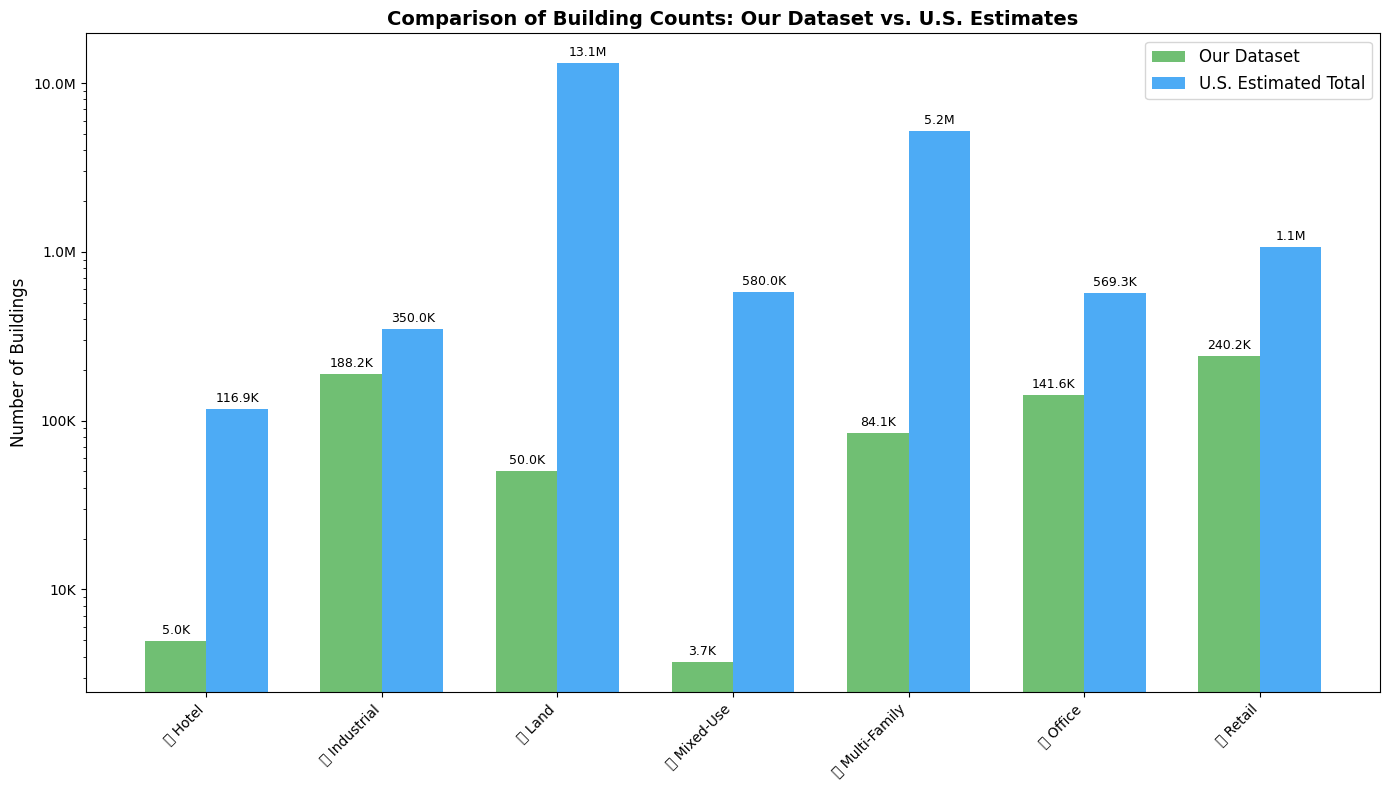

C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:102: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:102: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:102: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:102: UserWarning: Glyph 127976 (\N{HOTEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:102: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:102: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()

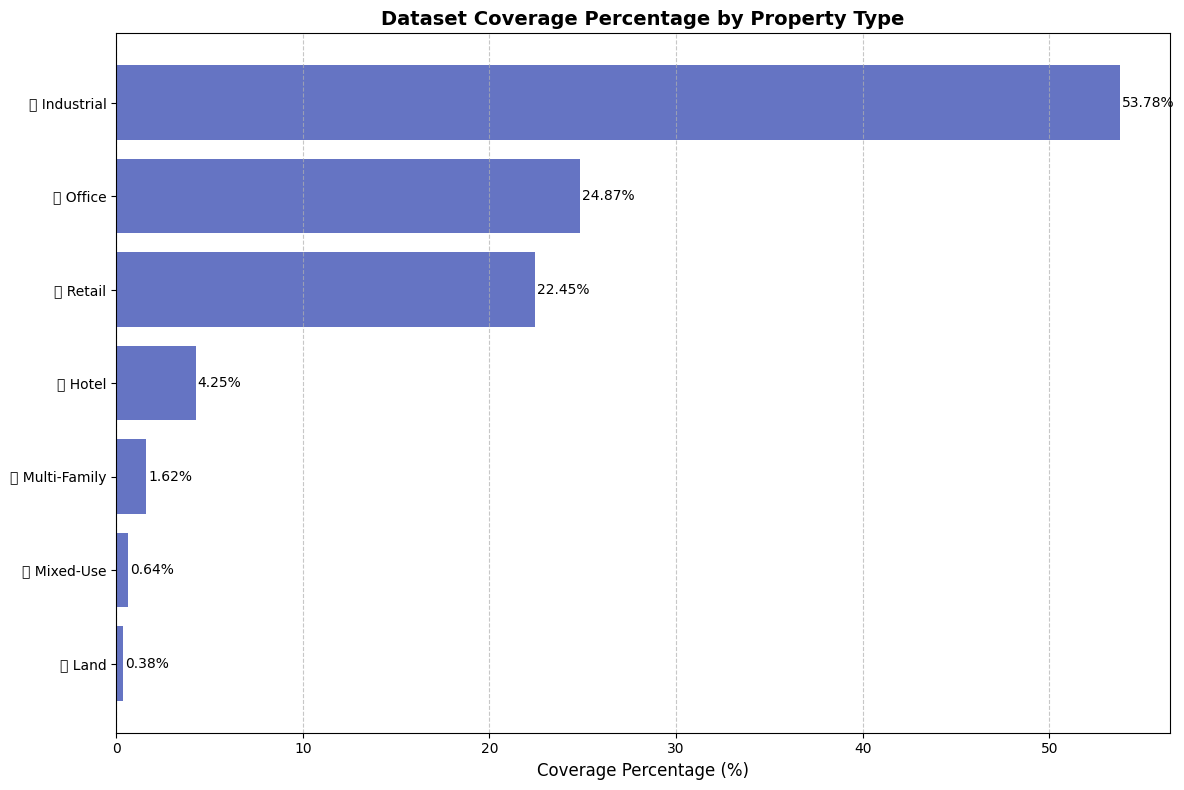

C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:121: UserWarning: Glyph 128717 (\N{SHOPPING BAGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:121: UserWarning: Glyph 127981 (\N{FACTORY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:121: UserWarning: Glyph 127970 (\N{OFFICE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:121: UserWarning: Glyph 127960 (\N{HOUSE BUILDINGS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:121: UserWarning: Glyph 127793 (\N{SEEDLING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\clint\AppData\Local\Temp\ipykernel_9500\4134330752.py:121: UserWarning: Glyph 129513 (\N{JIGSAW PUZZLE PIECE}) missing from font(s) DejaVu Sans.
  plt.ti

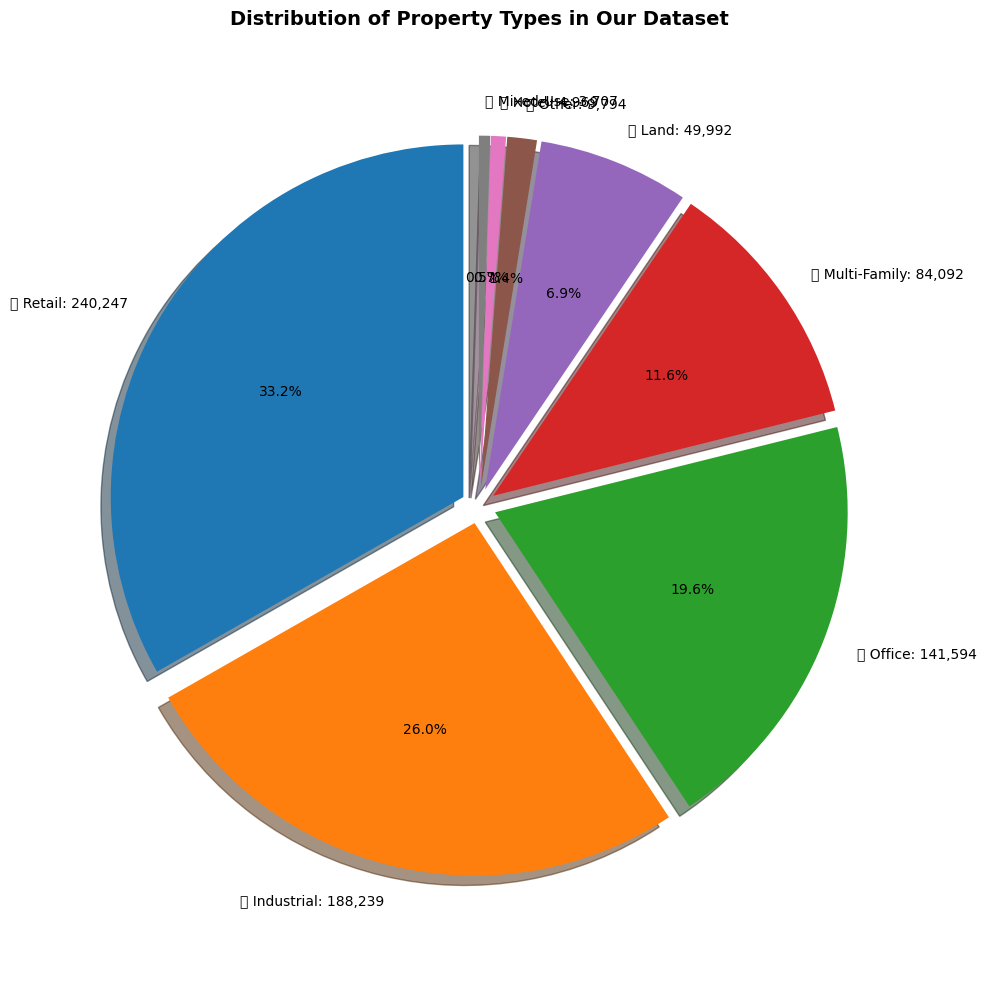

In [17]:
# Visualize the comparison
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Filter to categories where we have both our data and internet data (excluding Total)
comparable_categories = []
category_labels = []  # With emojis
our_counts = []
internet_counts = []

for category in our_data_counts:
    internet_category = category_mapping.get(category, 'Other')
    internet_count = internet_data.get(internet_category)
    emoji = category_emoji.get(internet_category, '')
    
    if internet_count is not None:
        comparable_categories.append(category)
        category_labels.append(f"{emoji} {category}")
        our_counts.append(our_data_counts[category])
        internet_counts.append(internet_count)

# Set up the bar chart
x = np.arange(len(comparable_categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, our_counts, width, label='Our Dataset', color='#4CAF50', alpha=0.8)
rects2 = ax.bar(x + width/2, internet_counts, width, label='U.S. Estimated Total', color='#2196F3', alpha=0.8)

# Function to format y labels in millions
def millions(x, pos):
    return f'{x/1000000:.1f}M' if x >= 1000000 else f'{x/1000:.0f}K'

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Buildings', fontsize=12)
ax.set_title('Comparison of Building Counts: Our Dataset vs. U.S. Estimates', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(category_labels, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=12)

# Use log scale for y-axis due to large differences in scale
ax.set_yscale('log')

# Format y-axis labels
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

# Add value labels on bars
def autolabel(rects):
    """Attach a text label above each bar showing its height"""
    for rect in rects:
        height = rect.get_height()
        # Format large numbers
        if height >= 1000000:
            label = f'{height/1000000:.1f}M'
        elif height >= 1000:
            label = f'{height/1000:.1f}K'
        else:
            label = f'{int(height):,}'
            
        ax.annotate(label,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# Create a coverage percentage chart (horizontal bar chart)
plt.figure(figsize=(12, 8))

# Calculate coverage percentages
coverage_percentages = []
labels = []

for i, category in enumerate(comparable_categories):
    coverage_pct = (our_counts[i] / internet_counts[i]) * 100
    coverage_percentages.append(coverage_pct)
    labels.append(f"{category_emoji.get(category_mapping.get(category, 'Other'), '')} {category}")

# Sort categories by coverage percentage
sorted_indices = np.argsort(coverage_percentages)
sorted_categories = [labels[i] for i in sorted_indices]
sorted_percentages = [coverage_percentages[i] for i in sorted_indices]

# Create horizontal bar chart
plt.barh(sorted_categories, sorted_percentages, color='#3F51B5', alpha=0.8)
plt.xlabel('Coverage Percentage (%)', fontsize=12)
plt.title('Dataset Coverage Percentage by Property Type', fontsize=14, fontweight='bold')

# Add percentage labels
for i, v in enumerate(sorted_percentages):
    plt.text(v + 0.1, i, f'{v:.2f}%', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create a pie chart showing dataset composition
plt.figure(figsize=(10, 10))

# Get counts for each category in our dataset
labels = [f"{category_emoji.get(category_mapping.get(cat, 'Other'), '')} {cat}: {count:,}" for cat, count in our_data_counts.items()]
values = list(our_data_counts.values())

# Sort by size for better visualization
sorted_indices = np.argsort(values)[::-1]  # reverse to get largest first
sorted_labels = [labels[i] for i in sorted_indices]
sorted_values = [values[i] for i in sorted_indices]

plt.pie(sorted_values, labels=sorted_labels, autopct='%1.1f%%', 
        startangle=90, shadow=True, explode=[0.05]*len(sorted_values))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Property Types in Our Dataset', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

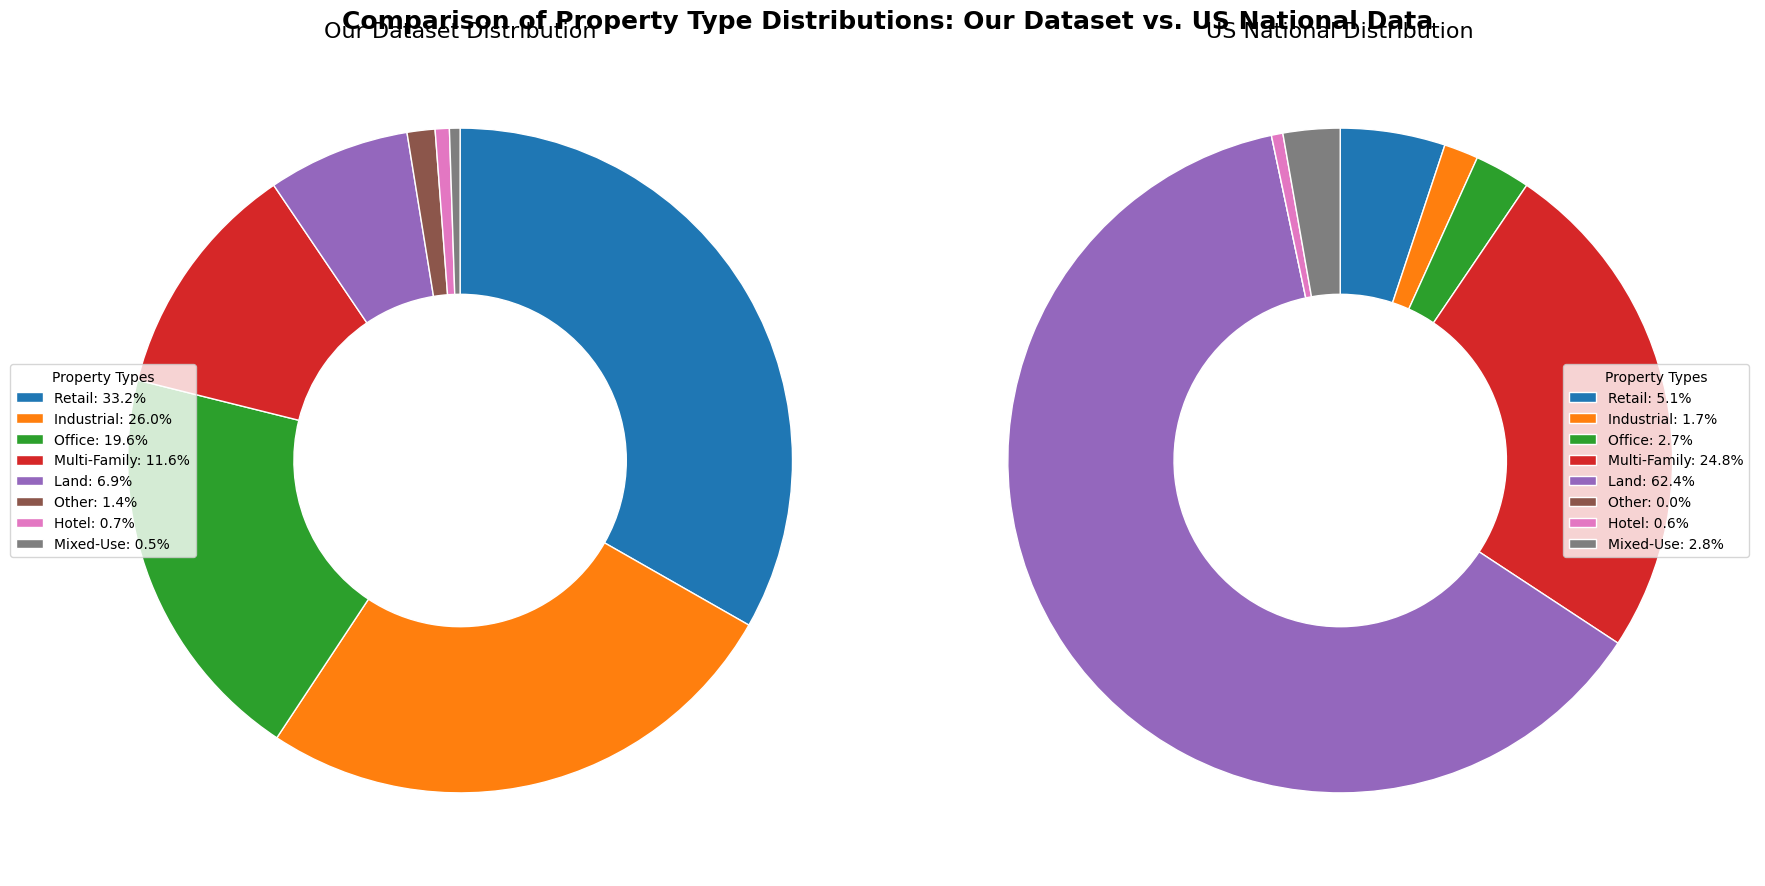

<Figure size 1400x800 with 0 Axes>

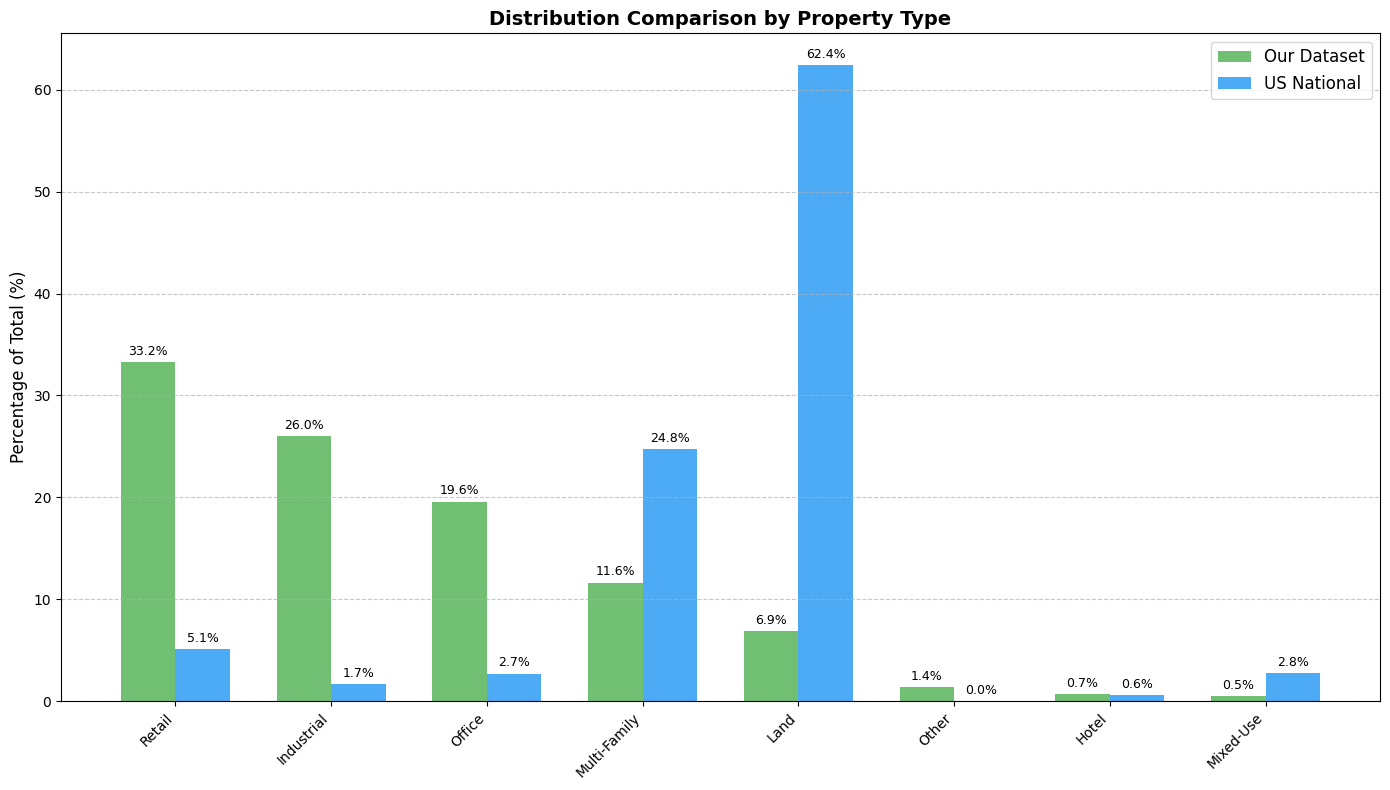

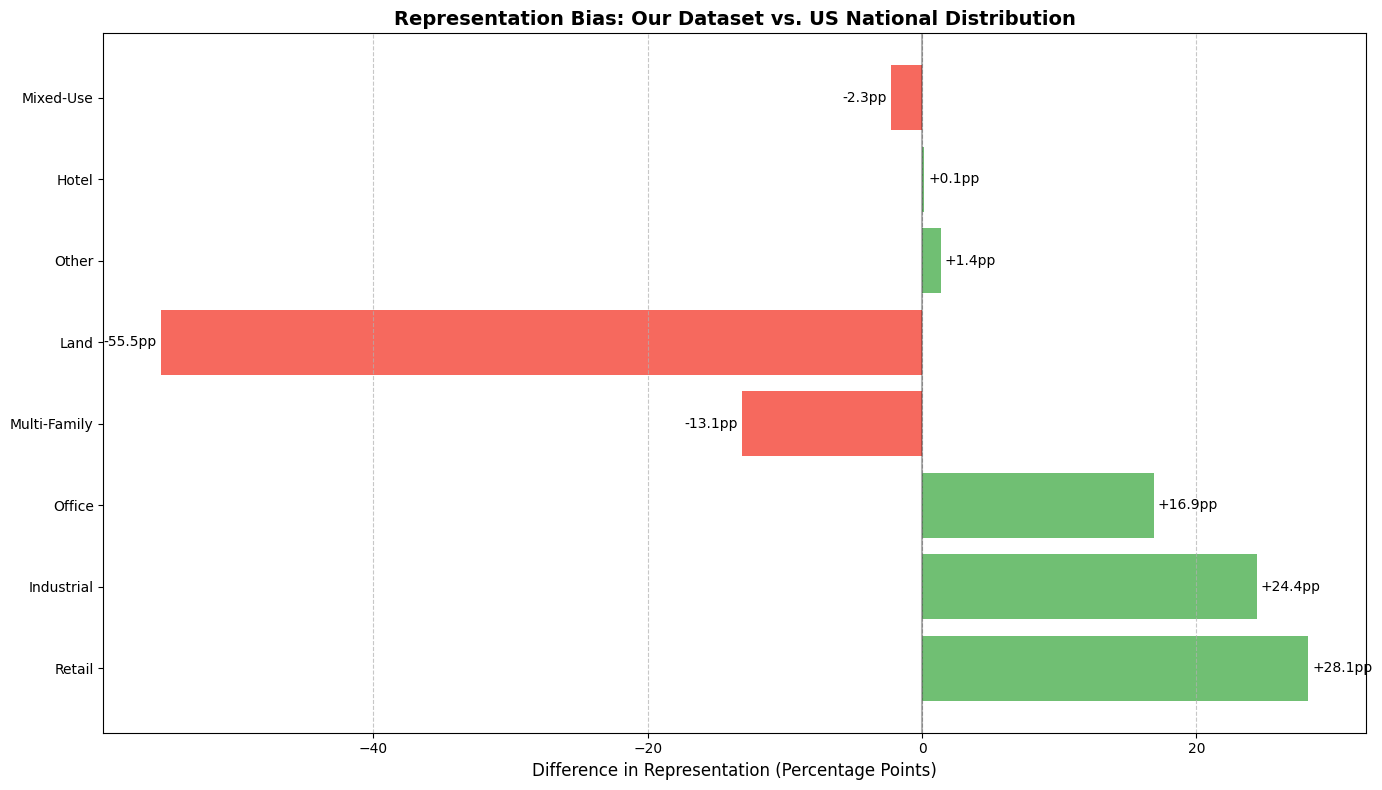

,Property Type,Our Dataset (%),US National (%),Difference (pp),Representation
0,Retail,33.25%,5.10%,+28.15,Over-represented
1,Industrial,26.05%,1.67%,+24.38,Over-represented
2,Office,19.59%,2.71%,+16.88,Over-represented
3,Multi-Family,11.64%,24.78%,-13.14,Under-represented
4,Land,6.92%,62.42%,-55.50,Under-represented
5,Other,1.36%,0.00%,+1.36,Over-represented
6,Hotel,0.69%,0.56%,+0.13,Over-represented
7,Mixed-Use,0.51%,2.76%,-2.25,Under-represented


In [20]:
# Create a comparison of percentage distributions between our dataset and US national data
import matplotlib.pyplot as plt
import numpy as np

# Remove emojis from our code
category_mapping_clean = {
    'Office': 'Office',
    'Industrial': 'Industrial',
    'Retail': 'Retail',
    'Multi-Family': 'Multi-Family',
    'Hotel': 'Hotel',
    'Land': 'Land',
    'Mixed-Use': 'Mixed-Use',
    'Other': 'Other'
}

# Get all property types that exist in either dataset
all_categories = set(category_mapping_clean.keys())

# Calculate the distribution percentages for our dataset
our_dataset_total = sum(our_data_counts.values())
our_dataset_distribution = {}

for category in all_categories:
    if category in our_data_counts:
        our_dataset_distribution[category] = (our_data_counts[category] / our_dataset_total) * 100
    else:
        our_dataset_distribution[category] = 0

# Calculate the distribution percentages for US national data
us_data_counts = {cat: internet_data.get(cat, 0) for cat in all_categories}

# Calculate total for non-None values
us_data_total = sum(count for count in us_data_counts.values() if count is not None)

us_data_distribution = {}
for category in all_categories:
    if us_data_counts[category] is not None:
        us_data_distribution[category] = (us_data_counts[category] / us_data_total) * 100
    else:
        # For categories that don't have direct counts (like 'Other')
        us_data_distribution[category] = 0

# Create a side-by-side pie chart comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Sort categories by our dataset percentages for consistency
sorted_categories = sorted(all_categories, key=lambda x: our_dataset_distribution[x], reverse=True)

# Filter out categories with 0% in both datasets
sorted_categories = [cat for cat in sorted_categories if our_dataset_distribution[cat] > 0 or us_data_distribution[cat] > 0]

# Create color mapping for consistency between charts
colors = plt.cm.tab10(np.arange(len(sorted_categories)))
color_map = {category: colors[i] for i, category in enumerate(sorted_categories)}

# Our dataset pie chart
our_values = [our_dataset_distribution[cat] for cat in sorted_categories]
our_labels = [f"{cat}: {our_dataset_distribution[cat]:.1f}%" for cat in sorted_categories]

wedges1, _ = ax1.pie(our_values, 
                     wedgeprops=dict(width=0.5, edgecolor='w'),
                     startangle=90,
                     counterclock=False,
                     colors=[color_map[cat] for cat in sorted_categories])

# US national data pie chart
us_values = [us_data_distribution[cat] for cat in sorted_categories]
us_labels = [f"{cat}: {us_data_distribution[cat]:.1f}%" for cat in sorted_categories]

wedges2, _ = ax2.pie(us_values, 
                     wedgeprops=dict(width=0.5, edgecolor='w'),
                     startangle=90,
                     counterclock=False,
                     colors=[color_map[cat] for cat in sorted_categories])

# Add titles
ax1.set_title('Our Dataset Distribution', fontsize=16)
ax2.set_title('US National Distribution', fontsize=16)

# Add legends with adjusted positions (moved closer to the charts)
ax1.legend(wedges1, our_labels, title="Property Types", loc="center left", bbox_to_anchor=(-0.05, 0, 0.3, 1))
ax2.legend(wedges2, us_labels, title="Property Types", loc="center right", bbox_to_anchor=(0.7, 0, 0.3, 1))

plt.suptitle('Comparison of Property Type Distributions: Our Dataset vs. US National Data', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

# Create a bar chart to directly compare the percentage differences
plt.figure(figsize=(14, 8))

# Prepare data for comparison
categories = sorted_categories  # Use the same sorting as above
our_percent = [our_dataset_distribution[cat] for cat in categories]
us_percent = [us_data_distribution[cat] for cat in categories]

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, our_percent, width, label='Our Dataset', color='#4CAF50', alpha=0.8)
rects2 = ax.bar(x + width/2, us_percent, width, label='US National', color='#2196F3', alpha=0.8)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of Total (%)', fontsize=12)
ax.set_title('Distribution Comparison by Property Type', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=12)

# Add grid for better readability
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

# Add percentage labels on bars
def autolabel(rects):
    """Attach a text label above each bar showing its height"""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=9)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# Calculate and display the representation bias
plt.figure(figsize=(14, 8))

# Calculate the difference (bias) between our dataset and US national percentages
# Positive values mean our dataset over-represents, negative means under-represents
bias = [our_dataset_distribution[cat] - us_data_distribution[cat] for cat in categories]

colors = ['#4CAF50' if x >= 0 else '#F44336' for x in bias]  # green for over-representation, red for under

# Create a horizontal bar chart for bias
plt.barh(categories, bias, color=colors, alpha=0.8)
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Difference in Representation (Percentage Points)', fontsize=12)
plt.title('Representation Bias: Our Dataset vs. US National Distribution', fontsize=14, fontweight='bold')

# Add value labels
for i, v in enumerate(bias):
    if v >= 0:
        plt.text(v + 0.3, i, f"+{v:.1f}pp", va='center')
    else:
        plt.text(v - 0.3, i, f"{v:.1f}pp", va='center', ha='right')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create a table to summarize the comparison
comparison_summary = []
for category in sorted_categories:
    our_pct = our_dataset_distribution[category]
    us_pct = us_data_distribution[category]
    diff = our_pct - us_pct
    bias_description = "Over-represented" if diff > 0 else "Under-represented" if diff < 0 else "Balanced"
    
    comparison_summary.append({
        'Property Type': category,
        'Our Dataset (%)': f"{our_pct:.2f}%",
        'US National (%)': f"{us_pct:.2f}%",
        'Difference (pp)': f"{diff:+.2f}",
        'Representation': bias_description
    })

summary_df = pd.DataFrame(comparison_summary)
display(summary_df)